In [1]:
# Gradient Descent Linear Regression

# Base Idea

We search through gradients in a supposedly linear fit graph made up of a number of points. These points form a data set, using these we fit the line based on the error away from the current line to minimise the error over all values.

    Honestly sounds like we could easily get barren plateaus from this method, however, I'll choose to ignore that for the time being

# Code

In [2]:
from numpy import *
import matplotlib.pyplot as plt

We have a plot with lots of data points, we draw a random line through the data. We compute the error from the points, this is done by finding every points y-axis distance to the line. We sum these distances:
\begin{equation}
\text{Error}_{(m, b)} = \frac{1}{N} \sum^N_{i = 1} (y_i - (m x_i + b))^2
\end{equation}
This equation matches the displacement (not distance as we're working in a 1D frame of reference) in the y-axis from the line to the point, squares this, sums all the squares and divides it by the number of points, this is known as the squared sum average. We'll do this now!

In [3]:
def compute_error_for_line_given_points(b, m, points):
    # Initialise to 0
    totalError = 0

    # For every point
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]

        # Difference of points, squared, sum
        totalError += (y - ( m * x + b )) ** 2
        
    return totalError / float(len(points))     # Return the squared sum averaged

We want to run through every iterations and return the new values of b and m getting more and more accurate as we continue on

In [4]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    # Get starting values
    b = starting_b
    m = starting_m

    # Gradient Descent -- Main concept to learn from this project :)
    for i in range(num_iterations):
        # Update b and m values that are more accurate
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

Gradient descent finds the local minima (essential high school pre-calc, you got this easily!) but yes this is proof that this simple model is prone to barren plateaus, local minima is find for the case of linear regression that we're using, because we only have a single grouping of data, however, worth exploring barren plateau avoidant algorithms! This is helpful for physics where data sets can be very prone to having barren plateaus.
To explore the gradient descent we'll analyse the partial derivatives of b and m with the error function:
\begin{align}
\frac{\partial E_{(m, b)}}{\partial m} = \frac{2}{N} \sum^N_{i=1} - x_i (y_i - (m x_i + b)),&&
\frac{\delta E_{(m, b)}}{\delta b} = \frac{2}{N} \sum^N_{i=1} - (y_i - (m x_i + b))
\end{align}

In [5]:
def step_gradient(b_current, m_current, points, learning_rate):
    # Initialise variables
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))

    # Optimise
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]

        # Direction with respect to b and m
        # we will compute the partial derivatives of these variables with our error function
        m_gradient += -(2 / N) * x * (y - ((m_current * x) + b_current))
        b_gradient += -(2 / N) * (y - ((m_current * x) + b_current))

    # Update our values
    new_m = m_current - (learning_rate * m_gradient)
    new_b = b_current - (learning_rate * b_gradient)
    return [new_b, new_m]

Starting Gradient descent at b = 0, m = 0, error = 5565.107834483211
Ending point after 1000 at b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


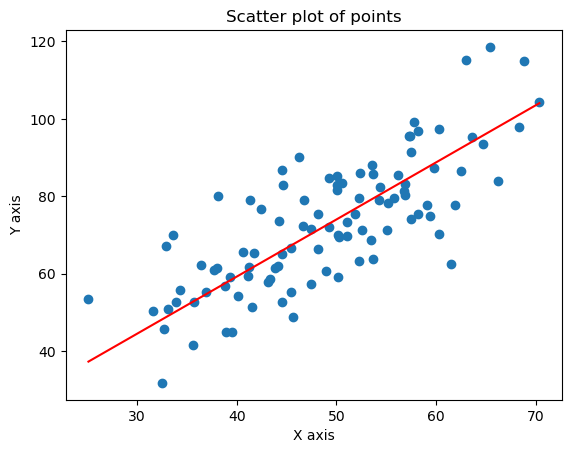

In [6]:
# Collect data
points = genfromtxt('data.csv', delimiter=',')

# Define hyperparameters
learning_rate = 0.0001    # Speed of convergence - how fast do we want to iterate through gradients
# y = mx + b (Linear slope)
initial_b = 0
initial_m = 0
num_iterations = 1000

# Train our model
print(f'Starting Gradient descent at b = {initial_b}, m = {initial_m}, error = {compute_error_for_line_given_points(initial_b, initial_m, points)}')
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
print(f'Ending point after {num_iterations} at b = {b}, m = {m}, error = {compute_error_for_line_given_points(b, m, points)}')

# Extract x and y coordinates
x = points[:, 0]
y = points[:, 1]
x_line = linspace(min(x), max(x), 71)
y_line = m * x_line + b

# Plot the points
plt.scatter(x, y)
plt.plot(x_line, y_line, label=f'Line: y = {m}x + {b}', color='red')

# Add labels and title
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Scatter plot of points')

# Show the plot
plt.show()